In [ ]:
#Required Libraries
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [ ]:
#Read dataset
data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')


In [ ]:
data.head()

In [ ]:
data.Outcome.value_counts()

In [ ]:
#Grab features and label from dataframe
x = data[['Pregnancies','Glucose', 'BloodPressure', 'Age', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].values
y = data['Outcome'].values

print(x.shape)
print(y.shape)

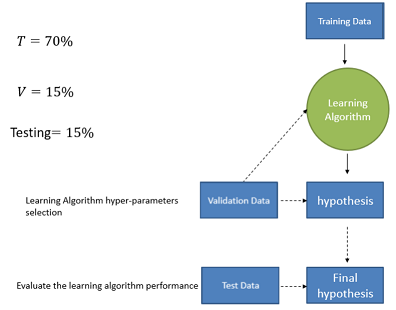

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.50, random_state = 42)

print(len(x_train))
print(len(x_test))
print(len(x_valid))

In [ ]:
class LogisticRegression:
    
    def __init__(self, l_rate=0.01, iterations=1000):  
        self.l_rate = l_rate  
        self.iterations = iterations 
        
    def scale(self, x):  
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled
    
    def fit(self, x, y):  
        self.losses = []  
        self.theta = np.zeros((1 + x.shape[1])) 
        n = x.shape[0]
        
        x = self.scale(x)  
                
        for i in range(self.iterations):
            #Step1
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])
            z = y_pred
            #Step2
            g_z =  1 / (1 + np.e**(-z))       
            
            #Step3
            cost = (1/n)*(-y * np.log(g_z) - (1 - y) * np.log(1 - g_z))
            self.losses.append(cost) 
            
            #Step4
            d_theta1 = (1/n) * np.dot(x.T, (g_z - y)) 
            d_theta0 = (1/n) * np.sum(g_z - y)  
            
            #Step5
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1  
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0       
        return self
    
    
    def predict(self, x):  
        x = self.scale(x)  
       
        y_pred = self.theta[0] + np.dot(x, self.theta[1:]) 
        z = y_pred
        g_z = 1 / (1 + np.e**(-z))
        return [1 if i > 0.4 else 0 for i in g_z] 
   

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
# print thetas
print("thetas= ", model.theta)

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

In [ ]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
valid_acc = metrics.accuracy_score(y_valid, y_pred_valid)  #Learning Algorithm hyper-parameters Tuning

print('Training Accuracy is : \n', train_acc)
print('--------------------------------')
print('Validation Accuracy is : \n', valid_acc)
print('--------------------------------')

In [ ]:
y_pred_test = model.predict(x_test)  

test_acc = metrics.accuracy_score(y_test, y_pred_test)  #Evaluate the learning algorithm performance

print('Testing Accuracy is : \n', test_acc)
print('--------------------------------')

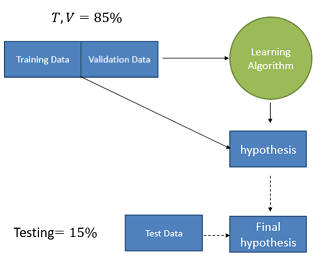


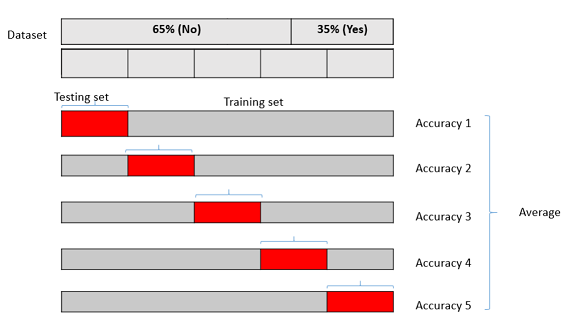

In [ ]:
#evaluation using cross validation
num_splits = 5
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], []  #create empty lists to store accurcy values
for train_index, test_index in kfold.split(x, y):  #Generate indices to split data into training and test set.
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_accs.append(metrics.accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(metrics.accuracy_score(y_test, y_pred_test) * 100)


In [ ]:
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t","\t", "Testing_Acc")

for i in range(num_splits):
    print(i,"\t", train_accs[i],"\t", test_accs[i])
    
    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits
    
print("Av", "\t", ave_train_acc,"\t", ave_test_acc)